In [6]:
#API has a Client(The one sending in the request) and
# a Server(The application sending the response to that client)

In [39]:


from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '94d54afa-afc8-474e-8f14-2294e4f0defa',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  


{'status': {'timestamp': '2024-11-07T09:25:45.331Z', 'error_code': 0, 'error_message': None, 'elapsed': 22, 'credit_count': 1, 'notice': None, 'total_count': 9921}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11795, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [40]:
type(data)

dict

In [41]:
import pandas as pd

df = pd.set_option('display.max_columns', None)
df = pd.set_option('display.max_rows', None)

In [43]:
#Time Stamp
#Creates a time stamp as at the day the script automation is being ran
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11795,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.977891e+07,1.977891e+07,False,NaN,1,NaN,NaN,None,2024-11-07T09:24:00.000Z,75038.798832,7.478520e+10,-24.0041,-0.106869,1.783697,3.774397,20.207802,37.430967,23.081884,1.484186e+12,60.0937,1.575815e+12,None,2024-11-07T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 10:26:38.005670
1,1027,Ethereum,ETH,ethereum,9483,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204193e+08,1.204193e+08,True,NaN,2,NaN,NaN,None,2024-11-07T09:24:00.000Z,2822.480832,3.528503e+10,0.1735,0.107091,7.744919,6.850953,16.392287,22.567950,5.919194,3.398811e+11,13.7616,3.398811e+11,None,2024-11-07T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 10:26:38.005670
2,825,Tether USDt,USDT,tether,102539,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.213787e+11,1.228363e+11,True,NaN,3,NaN,NaN,None,2024-11-07T09:24:00.000Z,1.000444,1.233350e+11,-14.2494,-0.004835,0.018925,0.064027,0.061747,0.052907,0.019995,1.214325e+11,4.9167,1.228908e+11,None,2024-11-07T09:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-07 10:26:38.005670
3,5426,Solana,SOL,solana,779,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.715783e+08,5.879510e+08,True,NaN,4,NaN,NaN,None,2024-11-07T09:24:00.000Z,187.936211,5.358575e+09,-36.8325,-0.276288,2.261686,7.678538,31.308241,44.152413,18.618117,8.862663e+10,3.5884,1.104973e+11,None,2024-11-07T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 10:26:38.005670
4,1839,BNB,BNB,bnb,2273,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440996e+08,1.440996e+08,False,NaN,5,NaN,NaN,None,2024-11-07T09:24:00.000Z,594.780442,1.999166e+09,-7.4224,-0.324604,2.388050,2.045020,4.265025,18.167036,16.835477,8.570763e+10,3.4702,8.570763e+10,None,2024-11-07T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 10:26:38.005670
5,3408,USDC,USDC,usd-coin,22888,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.671660e+10,3.671660e+10,False,NaN,6,NaN,NaN,None,2024-11-07T09:24:00.000Z,1.000089,1.297950e+10,-14.3956,0.006121,0.007395,0.001159,-0.002328,0.008911,0.012683,3.671987e+10,1.4563,3.671987e+10,None,2024-11-07T09:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-07 10:26:38.005670
6,52,XRP,XRP,xrp,1414,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.686866e+10,9.998704e+10,False,NaN,7,NaN,NaN,None,2024-11-07T09:24:00.000Z,0.553764,1.936986e+09,-0.2896,-0.448360,3.929122,6.805090,4.763390,4.413963,-7.455630,3.149182e+10,1.2489,5.537640e+10,None,2024-11-07T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 10:26:38.005670
7,74,Dogecoin,DOGE,dogecoin,1093,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.466898e+11,1.466898e+11,True,NaN,8,NaN,NaN,None,2024-11-07T09:23:00.000Z,0.191956,6.282762e+09,-43.1821,-0.455046,-2.031992,12.562610,78.975600,99.949660,82.235099,2.815795e+10,1.1428,2.815795e+10,None,2024-11-07T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 10:26:38.005670
8,1958,TRON,TRX,tron,1063,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.643219e+10,8.643222e+1

In [44]:
#AUTOMATION SCRIPTS 
# i want to know when i ran, or when those loops go through an automated stuff
# Create an automated process(Function) that is going to append data to the dataframe Above
def api_runner():
  global df
  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
  'start':'1',
  'limit':'15', 
  'convert':'USD'
  }
  headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '94d54afa-afc8-474e-8f14-2294e4f0defa',
  }
  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    #print(data)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)
# Normalizing the data and then tracking it per instant time by time:
   
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    
   # df10 = df[['name', 'quote.USD.price', 'timestamp']]
   # df10 = df10.query("name == 'Bitcoin'")
   # df10
      
#checking to see if the file exists then if not it creates the file (i.e the tbale data with the column rows and headers) based on the dataframe then called unto the next line
    if not os.path.isfile(r'C:\Users\Ichibor Joel\Desktop\Folder to query from\API.csv'):
        df.to_csv(r'C:\Users\Ichibor Joel\Desktop\Folder to query from\API.csv', header= 'column_names')
#this next side is for if the API File is there       
    else:
       df.to_csv(r'C:\Users\Ichibor Joel\Desktop\Folder to query from\API.csv',  mode='a', header=False)
        

In [45]:
#Automation Script


import os
from time import time
from time import sleep

for i in range(332):
    api_runner()
    print('Api Runner Completed Successfully')
    sleep(60)#sleep 1 minute
exit()    

Api Runner Completed Successfully


KeyboardInterrupt: 

In [13]:
#how to call the data youve now added to the file above:
df72 = pd.read_csv()
df72

TypeError: read_csv() missing 1 required positional argument: 'filepath_or_buffer'

In [46]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11795,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.977891e+07,1.977891e+07,False,NaN,1,NaN,NaN,None,2024-11-07T09:24:00.000Z,75038.798832,7.478520e+10,-24.0041,-0.106869,1.783697,3.774397,20.207802,37.430967,23.081884,1.484186e+12,60.0937,1.575815e+12,None,2024-11-07T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 10:26:38.005670
1,1027,Ethereum,ETH,ethereum,9483,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204193e+08,1.204193e+08,True,NaN,2,NaN,NaN,None,2024-11-07T09:24:00.000Z,2822.480832,3.528503e+10,0.1735,0.107091,7.744919,6.850953,16.392287,22.567950,5.919194,3.398811e+11,13.7616,3.398811e+11,None,2024-11-07T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 10:26:38.005670
2,825,Tether USDt,USDT,tether,102539,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.213787e+11,1.228363e+11,True,NaN,3,NaN,NaN,None,2024-11-07T09:24:00.000Z,1.000444,1.233350e+11,-14.2494,-0.004835,0.018925,0.064027,0.061747,0.052907,0.019995,1.214325e+11,4.9167,1.228908e+11,None,2024-11-07T09:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-07 10:26:38.005670
3,5426,Solana,SOL,solana,779,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.715783e+08,5.879510e+08,True,NaN,4,NaN,NaN,None,2024-11-07T09:24:00.000Z,187.936211,5.358575e+09,-36.8325,-0.276288,2.261686,7.678538,31.308241,44.152413,18.618117,8.862663e+10,3.5884,1.104973e+11,None,2024-11-07T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 10:26:38.005670
4,1839,BNB,BNB,bnb,2273,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440996e+08,1.440996e+08,False,NaN,5,NaN,NaN,None,2024-11-07T09:24:00.000Z,594.780442,1.999166e+09,-7.4224,-0.324604,2.388050,2.045020,4.265025,18.167036,16.835477,8.570763e+10,3.4702,8.570763e+10,None,2024-11-07T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 10:26:38.005670
5,3408,USDC,USDC,usd-coin,22888,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.671660e+10,3.671660e+10,False,NaN,6,NaN,NaN,None,2024-11-07T09:24:00.000Z,1.000089,1.297950e+10,-14.3956,0.006121,0.007395,0.001159,-0.002328,0.008911,0.012683,3.671987e+10,1.4563,3.671987e+10,None,2024-11-07T09:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-07 10:26:38.005670
6,52,XRP,XRP,xrp,1414,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.686866e+10,9.998704e+10,False,NaN,7,NaN,NaN,None,2024-11-07T09:24:00.000Z,0.553764,1.936986e+09,-0.2896,-0.448360,3.929122,6.805090,4.763390,4.413963,-7.455630,3.149182e+10,1.2489,5.537640e+10,None,2024-11-07T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 10:26:38.005670
7,74,Dogecoin,DOGE,dogecoin,1093,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.466898e+11,1.466898e+11,True,NaN,8,NaN,NaN,None,2024-11-07T09:23:00.000Z,0.191956,6.282762e+09,-43.1821,-0.455046,-2.031992,12.562610,78.975600,99.949660,82.235099,2.815795e+10,1.1428,2.815795e+10,None,2024-11-07T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 10:26:38.005670
8,1958,TRON,TRX,tron,1063,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.643219e+10,8.643222e+1

In [47]:
pd.set_option('display.float_format', lambda x: '%.5f'  % x)  #format floating point numbers; that is the "circulating supply " and "total supply"

In [48]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11795,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19778909.00000,19778909.00000,False,NaN,1,NaN,NaN,None,2024-11-07T09:24:00.000Z,75038.79883,74785196293.82330,-24.00410,-0.10687,1.78370,3.77440,20.20780,37.43097,23.08188,1484185573570.40747,60.09370,1575814775475.15991,None,2024-11-07T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 10:26:38.005670
1,1027,Ethereum,ETH,ethereum,9483,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120419290.02894,120419290.02894,True,NaN,2,NaN,NaN,None,2024-11-07T09:24:00.000Z,2822.48083,35285033345.09422,0.17350,0.10709,7.74492,6.85095,16.39229,22.56795,5.91919,339881137874.32373,13.76160,339881137874.32001,None,2024-11-07T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 10:26:38.005670
2,825,Tether USDt,USDT,tether,102539,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,121378654700.61101,122836276432.55733,True,NaN,3,NaN,NaN,None,2024-11-07T09:24:00.000Z,1.00044,123334970713.28532,-14.24940,-0.00484,0.01893,0.06403,0.06175,0.05291,0.02000,121432497827.63782,4.91670,122890766155.25000,None,2024-11-07T09:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-07 10:26:38.005670
3,5426,Solana,SOL,solana,779,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,471578272.07661,587951023.75130,True,NaN,4,NaN,NaN,None,2024-11-07T09:24:00.000Z,187.93621,5358575163.38406,-36.83250,-0.27629,2.26169,7.67854,31.30824,44.15241,18.61812,88626633792.73376,3.58840,110497287842.82001,None,2024-11-07T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 10:26:38.005670
4,1839,BNB,BNB,bnb,2273,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144099606.25154,144099606.25154,False,NaN,5,NaN,NaN,None,2024-11-07T09:24:00.000Z,594.78044,1999165552.45100,-7.42240,-0.32460,2.38805,2.04502,4.26503,18.16704,16.83548,85707627482.98703,3.47020,85707627482.99001,None,2024-11-07T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 10:26:38.005670
5,3408,USDC,USDC,usd-coin,22888,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,36716595419.95679,36716595419.95679,False,NaN,6,NaN,NaN,None,2024-11-07T09:24:00.000Z,1.00009,12979499756.02523,-14.39560,0.00612,0.00740,0.00116,-0.00233,0.00891,0.01268,36719868698.69928,1.45630,36719868698.70000,None,2024-11-07T09:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-07 10:26:38.005670
6,52,XRP,XRP,xrp,1414,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56868662755.00000,99987041380.00000,False,NaN,7,NaN,NaN,None,2024-11-07T09:24:00.000Z,0.55376,1936985763.74037,-0.28960,-0.44836,3.92912,6.80509,4.76339,4.41396,-7.45563,31491817471.41135,1.24890,55376398785.89000,None,2024-11-07T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 10:26:38.005670
7,74,Dogecoin,DOGE,dogecoin,1093,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146689826383.70523,146689826383.70523,True,NaN,8,NaN,NaN,None,2024-11-07T09:23:00.000Z,0.19196,6282761790.50251,-43.18210,-0.45505,-2.03199,12.56261,78.97560,99.94966,82.23510,28157948947.96544,1.14280,28157948947.97000,None,2024-11-07T09:23:00.000Z,NaN,NaN,Na

In [49]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3  #GROUPED-CRYPTO-CURRENCY THE MAIN COINS

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.10687,1.78370,3.77440,20.20780,37.43097,23.08188
Ethereum,0.10709,7.74492,6.85095,16.39229,22.56795,5.91919
Tether USDt,-0.00484,0.01893,0.06403,0.06175,0.05291,0.02000
Solana,-0.27629,2.26169,7.67854,31.30824,44.15241,18.61812
BNB,-0.32460,2.38805,2.04502,4.26503,18.16704,16.83548
USDC,0.00612,0.00740,0.00116,-0.00233,0.00891,0.01268
XRP,-0.44836,3.92912,6.80509,4.76339,4.41396,-7.45563
Dogecoin,-0.45505,-2.03199,12.56261,78.97560,99.94966,82.23510
TRON,-0.03017,-0.93229,-5.03325,3.31337,6.41775,26.67140


In [ ]:
#stacking : basically a form of pivoting hte above columns

In [50]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.10687
              quote.USD.percent_change_24h     1.78370
              quote.USD.percent_change_7d      3.77440
              quote.USD.percent_change_30d    20.20780
              quote.USD.percent_change_60d    37.43097
              quote.USD.percent_change_90d    23.08188
Ethereum      quote.USD.percent_change_1h      0.10709
              quote.USD.percent_change_24h     7.74492
              quote.USD.percent_change_7d      6.85095
              quote.USD.percent_change_30d    16.39229
              quote.USD.percent_change_60d    22.56795
              quote.USD.percent_change_90d     5.91919
Tether USDt   quote.USD.percent_change_1h     -0.00484
              quote.USD.percent_change_24h     0.01893
              quote.USD.percent_change_7d      0.06403
              quote.USD.percent_change_30d     0.06175
              quote.USD.percent_change_60d     0.05291
              quote.US

In [51]:
type(df3)

pandas.core.frame.DataFrame

In [52]:
type(df4)

pandas.core.series.Series

In [53]:
df5 = df4.to_frame(name='values')
df5 #converts series back into dataframe

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.10687
             quote.USD.percent_change_24h   1.78370
             quote.USD.percent_change_7d    3.77440
             quote.USD.percent_change_30d  20.20780
             quote.USD.percent_change_60d  37.43097
             quote.USD.percent_change_90d  23.08188
Ethereum     quote.USD.percent_change_1h    0.10709
             quote.USD.percent_change_24h   7.74492
             quote.USD.percent_change_7d    6.85095
             quote.USD.percent_change_30d  16.39229
             quote.USD.percent_change_60d  22.56795
             quote.USD.percent_change_90d   5.91919
Tether USDt  quote.USD.percent_change_1h   -0.00484
             quote.USD.percent_change_24h   0.01893
             quote.USD.percent_change_7d    0.06403
             quote.USD.percent_change_30d   0.06175
             quote.USD.percent_change_60d   0.05291
             quote.USD.percent_change_90d   0.02000
Solana       quote.USD.percent_change_1h   -0.27629
             quote.USD.percent_change_24h   2.26169
             quote.USD.percent_change_7d    7.67854
             quote.USD.percent_change_30d  31.30824
             quote.USD.percent_change_60d  44.15241
             quote.USD.percent_change_90d  18.61812
BNB          quote.USD.percent_change_1h   -0.32460
             quote.USD.percent_change_24h   2.38805
             quote.USD.percent_change_7d    2.04502
             quote.USD.percent_change_30d   4.26503
             quote.USD.percent_change_60d  18.16704
             quote.USD.percent_change_90d  16.83548
USDC         quote.USD.percent_change_1h    0.00612
             quote.USD.percent_change_24h   0.00740
             quote.USD.percent_change_7d    0.00116
             quote.USD.percent_change_30d  -0.00233
             quote.USD.percent_change_60d   0.00891
             quote.USD.percent_change_90d   0.01268
XRP          quote.USD.percent_change_1h   -0.44836
             quote.USD.percent_change_24h   3.92912
             quote.USD.percent_change_7d    6.80509
             quote.USD.percent_change_30d   4.76339
             quote.USD.percent_change_60d   4.41396
             quote.USD.percent_change_90d  -7.45563
Dogecoin     quote.USD.percent_change_1h   -0.45505
             quote.USD.percent_change_24h  -2.03199
             quote.USD.percent_change_7d   12.56261
             quote.USD.percent_change_30d  78.97560
             quote.USD.percent_change_60d  99.94966
             quote.USD.percent_change_90d  82.23510
TRON         quote.USD.percent_change_1h   -0.03017
             quote.USD.percent_change_24h  -0.93229
             quote.USD.percent_change_7d   -5.03325
             quote.USD.percent_change_30d   3.31337
             quote.USD.percent_change_60d   6.41775
             quote.USD.percent_change_90d  26.67140
Cardano      quote.USD.percent_change_1h    0.04847
             quote.USD.percent_change_24h   3.69270
             quote.USD.percent_change_7d    4.43313
             quote.USD.percent_change_30d   5.60698
             quote.USD.percent_change_60d  10.13578
             quote.USD.percent_change_90d   7.13782
Toncoin      quote.USD.percent_change_1h    0.60047
             quote.USD.percent_change_24h   2.38613
             quote.USD.percent_change_7d   -1.11455
             quote.USD.percent_change_30d  -6.75314
             quote.USD.percent_change_60d   2.64633
             quote.USD.percent_change_90d -25.20351
Shiba Inu    quote.USD.percent_change_1h   -0.47750
             quote.USD.percent_change_24h   0.16205
             quote.USD.percent_change_7d    1.55310
             quote.USD.percent_change_30d   8.53842
             quote.USD.percent_change_60d  44.14130
             quote.USD.percent_change_90d  32.66225
Avalanche    quote.USD.percent_change_1h   -0.70706
             quote.USD.percent_change_24h   3.50325
             quote.USD.percent_change_7d    4.04096
             quote.USD.percent_change_30d

In [54]:
df5.count()

values    90
dtype: int64

In [55]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6 #to add index to the table

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.10687
1,Bitcoin,quote.USD.percent_change_24h,1.78370
2,Bitcoin,quote.USD.percent_change_7d,3.77440
3,Bitcoin,quote.USD.percent_change_30d,20.20780
4,Bitcoin,quote.USD.percent_change_60d,37.43097
5,Bitcoin,quote.USD.percent_change_90d,23.08188
6,Ethereum,quote.USD.percent_change_1h,0.10709
7,Ethereum,quote.USD.percent_change_24h,7.74492
8,Ethereum,quote.USD.percent_change_7d,6.85095
9,Ethereum,quote.USD.percent_change_30d,16.39229


In [56]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.10687
1,Bitcoin,quote.USD.percent_change_24h,1.78370
2,Bitcoin,quote.USD.percent_change_7d,3.77440
3,Bitcoin,quote.USD.percent_change_30d,20.20780
4,Bitcoin,quote.USD.percent_change_60d,37.43097
5,Bitcoin,quote.USD.percent_change_90d,23.08188
6,Ethereum,quote.USD.percent_change_1h,0.10709
7,Ethereum,quote.USD.percent_change_24h,7.74492
8,Ethereum,quote.USD.percent_change_7d,6.85095
9,Ethereum,quote.USD.percent_change_30d,16.39229


In [57]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1hr'])
df7

,name,percent_change,values
0,Bitcoin,1hr,-0.10687
1,Bitcoin,quote.USD.percent_change_24h,1.78370
2,Bitcoin,quote.USD.percent_change_7d,3.77440
3,Bitcoin,quote.USD.percent_change_30d,20.20780
4,Bitcoin,quote.USD.percent_change_60d,37.43097
5,Bitcoin,quote.USD.percent_change_90d,23.08188
6,Ethereum,1hr,0.10709
7,Ethereum,quote.USD.percent_change_24h,7.74492
8,Ethereum,quote.USD.percent_change_7d,6.85095
9,Ethereum,quote.USD.percent_change_30d,16.39229


In [25]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1hr,0.216398
1,Bitcoin,24h,2.512496
2,Bitcoin,7d,4.043852
3,Bitcoin,30d,20.461176
4,Bitcoin,60d,37.907652
5,Bitcoin,90d,23.018208
6,Ethereum,1hr,-0.027766
7,Ethereum,24h,8.813707
8,Ethereum,7d,7.125018
9,Ethereum,30d,16.127405


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

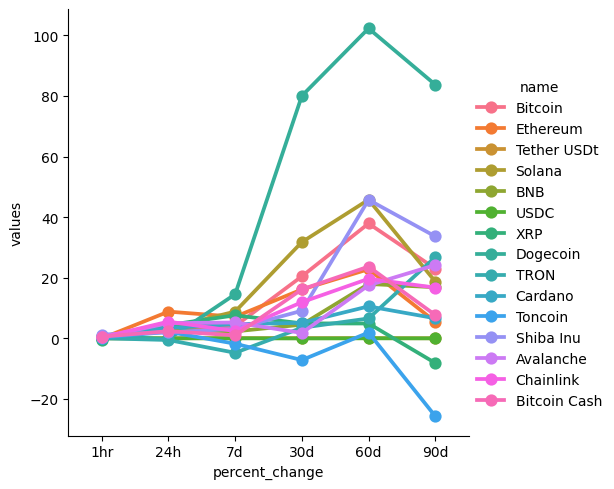

In [27]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [58]:
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10 #Meant to list variety of the above specified coins at different timestamps with the quote price but not working currently
#more information below 

,name,quote.USD.price,timestamp
0,Bitcoin,75038.79883,2024-11-07 10:26:38.005670


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

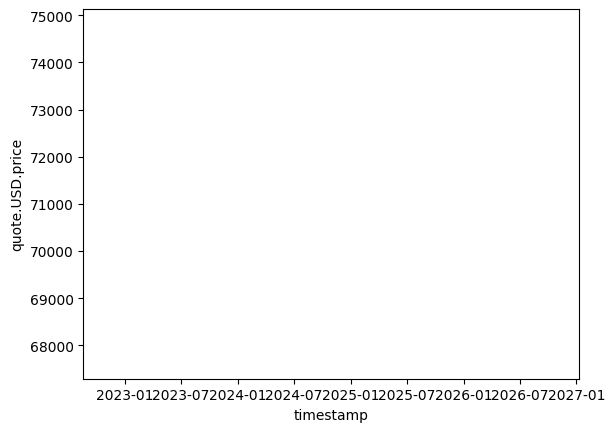

In [70]:
sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)  #fully think the issue is related to the automation, as a result line graph not showing

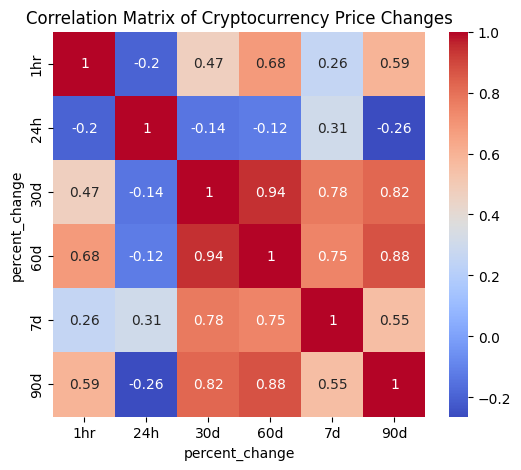

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df7 is your DataFrame with columns 'name', 'percent_change', and 'values'
correlation_matrix = df7.pivot_table(index='name', columns='percent_change', values='values').corr()

# Visualize the correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Cryptocurrency Price Changes")
plt.show()

In [35]:
pip install statsmodels


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 524.3 kB/s eta 0:00:18
   -- ------------------------------------- 0.5/9.9 MB 524.3 kB/s eta 0:00:18
   -- ------------------------------------- 0.5/9.9 MB 524.3 kB/s eta 0:00:18
   --- ------------------------------------ 0.8/9.9 MB 419.4 kB/s eta 0:00:22
   --- ------------------------------------ 0.8/9.9 MB 419.4 kB/s eta 0:00:22
   --- ------------------------------------ 0.8/9.9 MB 419.4 kB/s eta 0:00:22
   ---- ----------------------------------- 1.0/9.9 MB 449.4 kB/s eta 0:00:20
   ---- -------------------------------